In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict

from EEGNet import EEGNet
from run_model import run, draw_figure

In [2]:
from dataloader import read_bci_data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# Load data
train_data, train_label, test_data, test_label = read_bci_data()

# Convert data type into float32
train_data  = torch.from_numpy(train_data).type(torch.float32)
train_label = torch.from_numpy(train_label).type(torch.long)
test_data   = torch.from_numpy(test_data).type(torch.float32)
test_label  = torch.from_numpy(test_label).type(torch.long)

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


# Run Model

In [4]:

line_list = []
#label_list = ['elu_train','elu_test','leaky_relu_train','leaky_relu_test','relu_train','relu_test']
label_list = ['leaky_relu_train','leaky_relu_test']
'''
# ELU
net = EEGNet().to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               , num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''
# Leaky_relu
net = EEGNet(act_f='leakyrelu',hyper=2).to(device)
optimizer = optim.SGD(net.parameters(),lr=1e-3, weight_decay=1e-2,momentum=0.9)
#optimizer = optim.Adagrad(net.parameters(),lr=1e-4,lr_decay=0.8,weight_decay=5e-3)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label,\
                                               optimizer = optimizer, num_epochs = 300, batch_size = 64,\
                                               print_freq = 500)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''
# Relu
net = EEGNet(act_f='relu').to(device)
loss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label\
                                               ,num_epochs = 300, batch_size = 64, print_freq = 301)
line_list.append(acc_train_list)
line_list.append(acc_test_list)
'''

"\n# Relu\nnet = EEGNet(act_f='relu').to(device)\nloss_list, acc_train_list, acc_test_list = run(net, train_data,train_label,test_data,test_label                                               ,num_epochs = 300, batch_size = 64, print_freq = 301)\nline_list.append(acc_train_list)\nline_list.append(acc_test_list)\n"

# Draw loss & accuracy figures

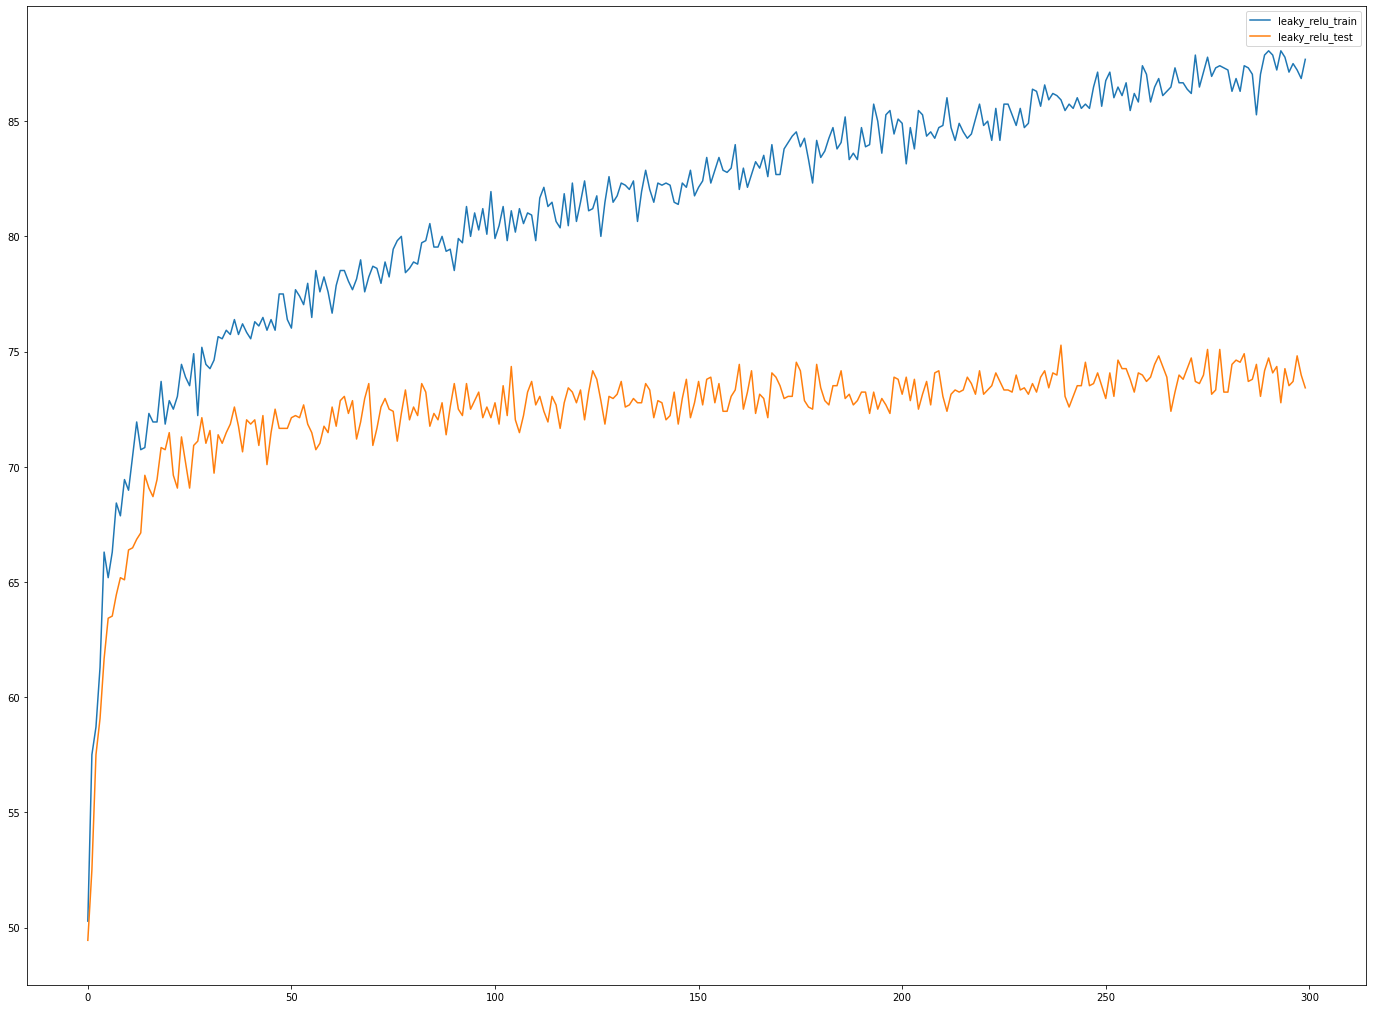

Test Accuracy =  73.42592592592592


In [7]:
plt.figure(figsize=[24,18])
draw_figure(plt,line_list,label_list, loc='best')
print('Test Accuracy = ',line_list[-1][-1])

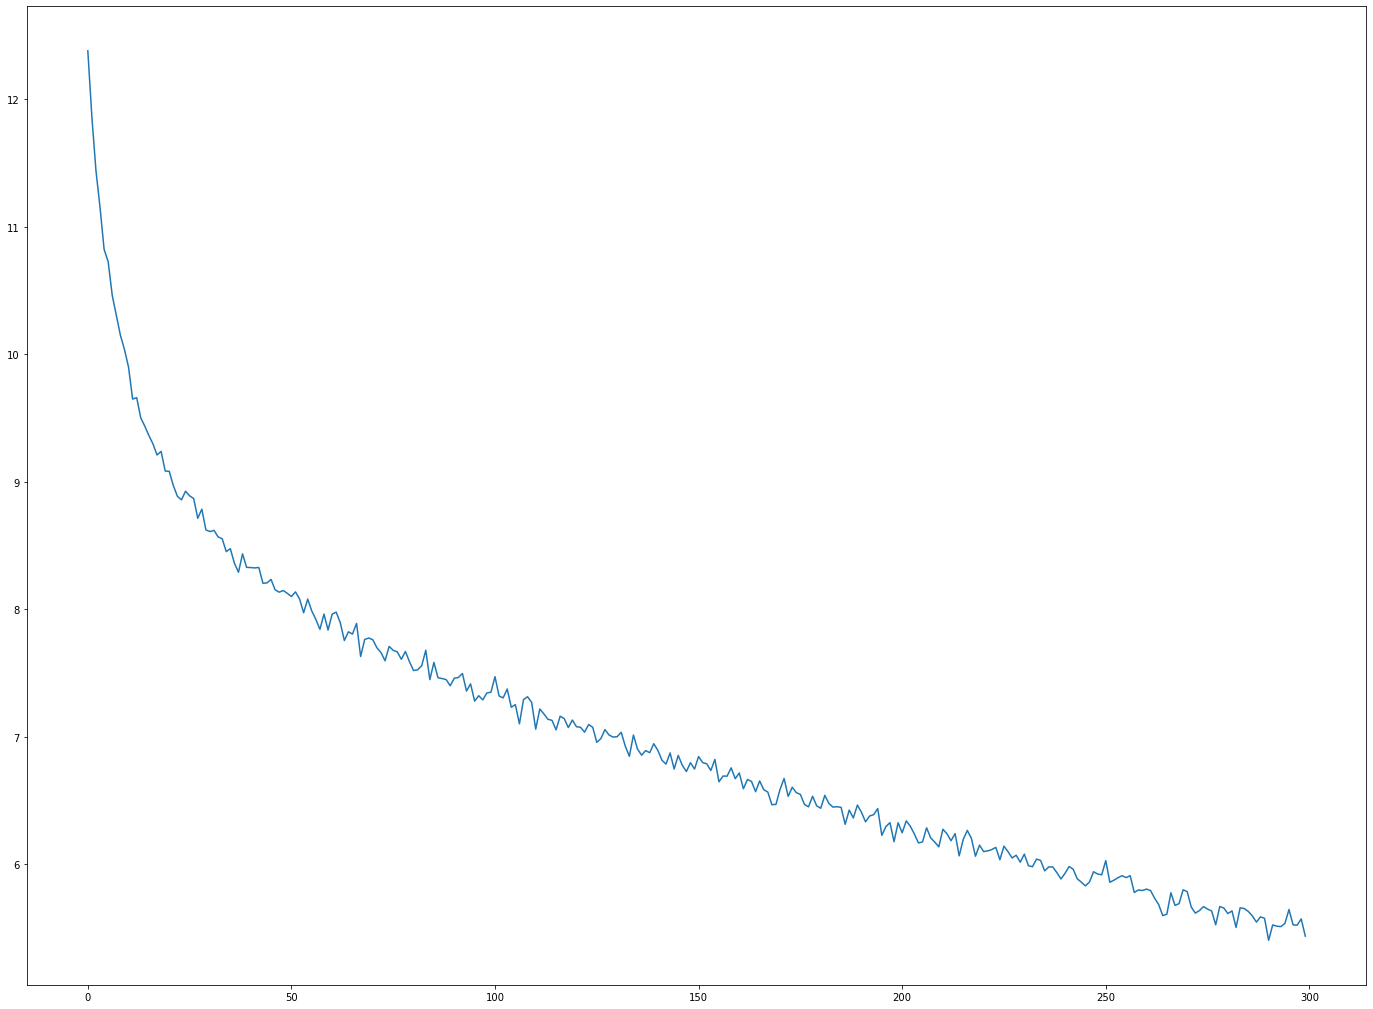

In [6]:
plt.figure(figsize=[24,18])
draw_figure(plt,[loss_list])